<a href="https://colab.research.google.com/github/hyeeeeeon/ProblemSolving/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Download

In [79]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("razanaqvi14/real-and-fake-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/real-and-fake-news


column: title, text, subject, date

In [80]:
import pandas as pd
import os

csv = pd.read_csv(os.path.join(path, "Fake.csv"))
fake_df = pd.DataFrame(csv)

csv = pd.read_csv(os.path.join(path, "True.csv"))
real_df = pd.DataFrame(csv)

In [81]:
# Download latest version
path = kagglehub.dataset_download("jillanisofttech/fake-or-real-news")

print("Path to dataset files:", path)

csv = pd.read_csv(os.path.join(path, "fake_or_real_news.csv"))

test_df = pd.DataFrame(csv)

Path to dataset files: /kaggle/input/fake-or-real-news


# title Îã®Ïñ¥ ÎπàÎèÑ Ïàò ÎπÑÍµê

In [82]:
import pandas as pd

# Í∞Å ÌååÏùºÏóêÏÑú Ï†úÎ™©Îßå Î∂àÎü¨Ïò§Í∏∞
#fake_title = fake_df['title'].dropna()
#real_title = real_df['title'].dropna()

# label Ïª¨Îüº Ï∂îÍ∞ÄÌï¥ÏÑú Ìï©ÏπòÍ∏∞ (ÎπÑÍµêÏö©)
fake_df['label'] = 'FAKE'
real_df['label'] = 'REAL'

# Ìï©ÏπòÍ∏∞
df = pd.concat([fake_df, real_df], ignore_index=True)

In [83]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_char_count'] = df['title'].apply(lambda x: len(x))

## Îã®Ïñ¥ Ïàò ÎπÑÍµê

In [84]:
print(df.head())
print(df.index)
print(df.columns)

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year‚Äô...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama‚Äôs Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  title_word_count  title_char_count  
0  December 31, 2017  FAKE                12                79  
1  December 31, 2017  FAKE                 8                69  
2  December 30, 2017  FAKE                15                90  
3  December 29

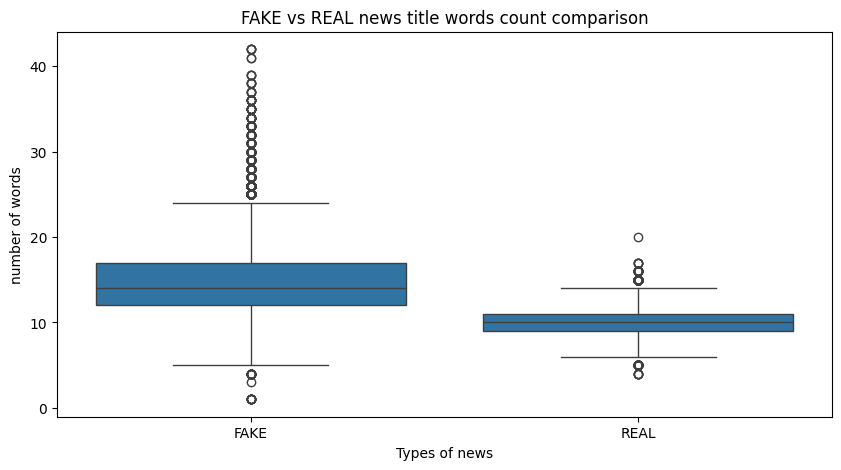

In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='title_word_count', data=df)
plt.title("FAKE vs REAL news title words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

## Îã®Ïñ¥ Ïàò Î∂ÑÌè¨ Í≤πÏπòÍ∏∞

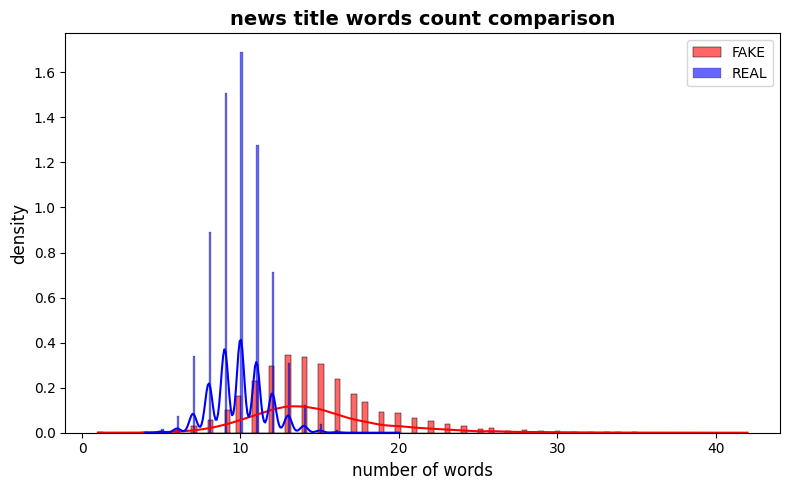

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['title_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['title_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## ÌèâÍ∑† Îã®Ïñ¥ Ïàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ + ÏàòÏπò ÌëúÏãú

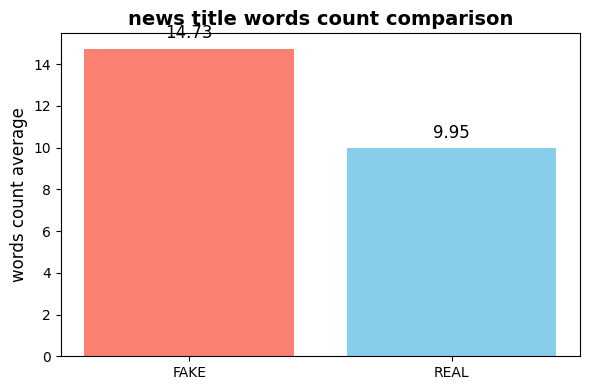

In [87]:
# ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
avg_words = df.groupby('label')['title_word_count'].mean().reset_index()

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['title_word_count'], color=['salmon', 'skyblue'])

# ÏàòÏπò ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news title words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# text Îã®Ïñ¥ ÎπàÎèÑ Ïàò ÎπÑÍµê

## Îã®Ïñ¥ Ïàò ÎπÑÍµê

In [88]:
X_features = pd.DataFrame()
X_features['title_length'] = df['title_word_count'].copy()
X_features['label'] = df['label'].copy()
X_features

title_length label
0                12  FAKE
1                 8  FAKE
2                15  FAKE
3                14  FAKE
4                11  FAKE
...             ...   ...
44893             9  REAL
44894             7  REAL
44895             7  REAL
44896             9  REAL
44897             9  REAL

[44898 rows x 2 columns]

In [89]:
import pandas as pd

# Í∞Å ÌååÏùºÏóêÏÑú Ï†úÎ™©Îßå Î∂àÎü¨Ïò§Í∏∞
fake_text = fake_df['text'].dropna()
real_text = real_df['text'].dropna()

# label Ïª¨Îüº Ï∂îÍ∞ÄÌï¥ÏÑú Ìï©ÏπòÍ∏∞ (ÎπÑÍµêÏö©)
fake_text['label'] = 'FAKE'
real_text['label'] = 'REAL'

# Ìï©ÏπòÍ∏∞
df = pd.concat([fake_df, real_df], ignore_index=True)

df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['text_char_count'] = df['text'].apply(lambda x: len(x))

In [90]:
X_features['text_length'] = df['text_word_count'].copy()
X_features

title_length label  text_length
0                12  FAKE          495
1                 8  FAKE          305
2                15  FAKE          580
3                14  FAKE          444
4                11  FAKE          420
...             ...   ...          ...
44893             9  REAL          466
44894             7  REAL          125
44895             7  REAL          320
44896             9  REAL          205
44897             9  REAL          210

[44898 rows x 3 columns]

## Îã®Ïñ¥ Ïàò Î∂ÑÌè¨ Í≤πÏπòÍ∏∞

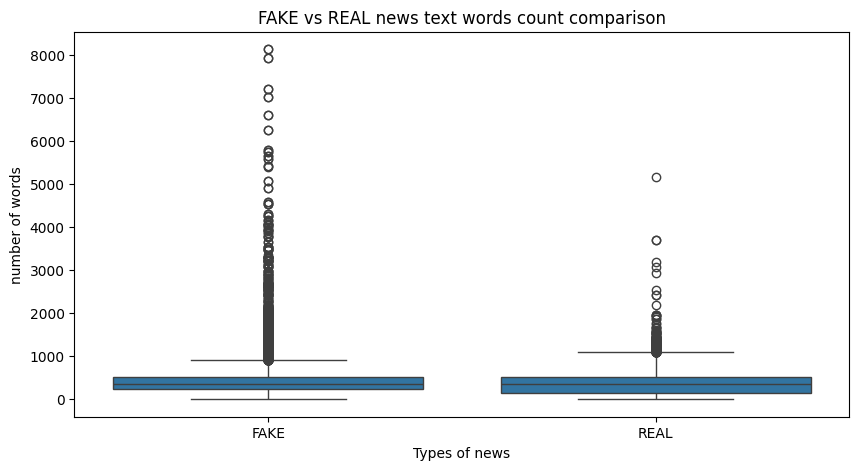

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title("FAKE vs REAL news text words count comparison")
plt.xlabel("Types of news")
plt.ylabel("number of words")
plt.show()

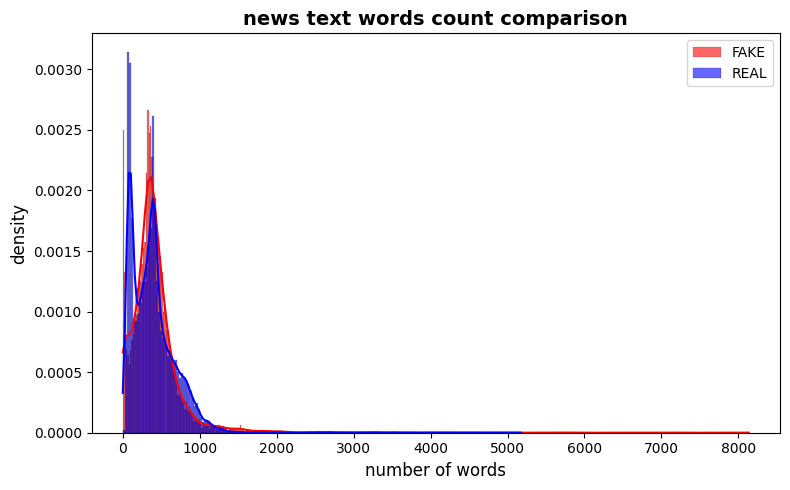

In [92]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['label'] == 'FAKE']['text_word_count'], color='red', label='FAKE', kde=True, stat='density', alpha=0.6)
sns.histplot(df[df['label'] == 'REAL']['text_word_count'], color='blue', label='REAL', kde=True, stat='density', alpha=0.6)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.xlabel("number of words", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## ÌèâÍ∑† Îã®Ïñ¥ Ïàò ÎßâÎåÄÍ∑∏ÎûòÌîÑ + ÏàòÏπò ÌëúÏãú

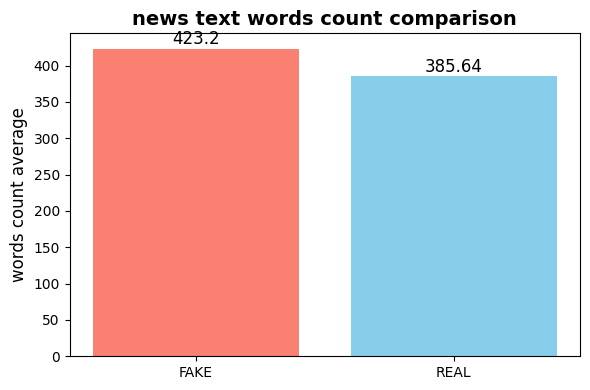

In [93]:
# ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
avg_words = df.groupby('label')['text_word_count'].mean().reset_index()

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(6, 4))
bars = plt.bar(avg_words['label'], avg_words['text_word_count'], color=['salmon', 'skyblue'])

# ÏàòÏπò ÌÖçÏä§Ìä∏ ÌëúÏãú
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title("news text words count comparison", fontsize=14, weight='bold')
plt.ylabel("words count average", fontsize=12)
plt.tight_layout()
plt.show()

# Í∞êÏ†ï Îã®Ïñ¥ Î∂ÑÏÑù
: ÏûêÍ∑πÏ†ÅÏù¥Í±∞ÎÇò ÌÅ¥Î¶≠ÏùÑ Ïú†ÎèÑÌïòÎäî Îã®Ïñ¥ Î∂ÑÏÑù

In [94]:
import pandas as pd
from collections import Counter
import re

# Í∏∞Î≥∏ Ï†ïÏ†ú Ìï®Ïàò
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
def extract_words(df, label):
    words = []
    for title in df[df['label'] == label]['title'].dropna():
        words.extend(clean_and_tokenize(title))
    return words

# Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
fake_words = extract_words(df, 'FAKE')
real_words = extract_words(df, 'REAL')

# ÎπàÎèÑÏàò Í≥ÑÏÇ∞
fake_counts = Counter(fake_words)
real_counts = Counter(real_words)

In [95]:
# FAKE Îã®Ïñ¥Í∞Ä REALÎ≥¥Îã§ Î™á Î∞∞ Îçî ÎßéÏùÄÏßÄ Í≥ÑÏÇ∞
word_ratio_data = []
for word in fake_counts:
    fake_count = fake_counts[word]
    real_count = real_counts.get(word, 0.5)  # 0Ïù¥Î©¥ 0.5Î°ú Î≥¥Ï†ï
    ratio = fake_count / real_count
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

# DataFrameÏúºÎ°ú Ï†ïÎ¶¨ (ÏÇ¨ÎûåÏù¥ Ìï¥ÏÑùÌï† Ïàò ÏûàÎèÑÎ°ù)
ratio_df = pd.DataFrame(word_ratio_data, columns=['word', 'fake_count', 'real_count', 'fake_to_real_ratio', 'total_count'])

# ÏµúÏÜå Îì±Ïû• Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
filtered_df = ratio_df[ratio_df['total_count'] >= 10].sort_values(by='fake_to_real_ratio', ascending=False)

# ÏÉÅÏúÑ 30Í∞úÎßå Ï∂úÎ†•
print("üìå Words that often appear only in the fake news Top 30")
display(filtered_df.head(30))


üìå Words that often appear only in the fake news Top 30


word  fake_count  real_count  fake_to_real_ratio  total_count
3155      hillarys         418         0.5           836.00000        418.5
5889           wow         372         0.5           744.00000        372.5
349      hilarious         262         0.5           524.00000        262.5
622          heres         245         0.5           490.00000        245.5
18245       boiler         205         0.5           410.00000        205.5
5473           lol         189         0.5           378.00000        189.5
10693           yr         179         0.5           358.00000        179.5
659         busted         179         0.5           358.00000        179.5
18246           ep         171         0.5           342.00000        171.5
2264     bombshell         166         0.5           332.00000        166.5
1339           dem         151         0.5           302.00000        151.5
1568     supporter         272         1.0           272.00000        273.0
189          video        8303        31.0           267.83871       8334.0
388           epic         132         0.5           264.00000        132.5
180    hilariously         129         0.5           258.00000        129.5
389            fck         129         0.5           258.00000        129.5
371        awesome         127         0.5           254.00000        127.5
769     disgusting         124         0.5           248.00000        124.5
6783        barack         123         0.5           246.00000        123.5
960      brilliant         123         0.5           246.00000        123.5
3565          whoa         121         0.5           242.00000        121.5
6432       crooked         114         0.5           228.00000        114.5
2824      illegals         108         0.5           216.00000        108.5
11142       aliens         107         0.5           214.00000        107.5
2267        tucker         100         0.5           200.00000        100.5
421            sht         100         0.5           200.00000        100.5
10615    flashback          99         0.5           198.00000         99.5
72           james          96         0.5           192.00000         96.5
1445      explains          92         0.5           184.00000         92.5
444        hannity          91         0.5           182.00000         91.5

fakeÏóê ÎßéÏù¥ ÎÇòÏò§Îäî Îã®Ïñ¥ ÏàòÎ•º Í∞ÄÏßÄÍ≥† realÏóêÏÑú ÏñºÎßàÎÇò ÎÇòÏò§ÎÇò ÎπÑÍµêÌñàÎäîÎç∞ realÏóêÎäî Í±∞Ïùò ÏïàÎÇòÏò§Îäî Í≤ΩÏö∞Í∞Ä ÎßéÏïÑ ÎπÑÏú®Ïù¥ Îã§ ÌÅ¨Í≤å ÎÇòÏò¥...

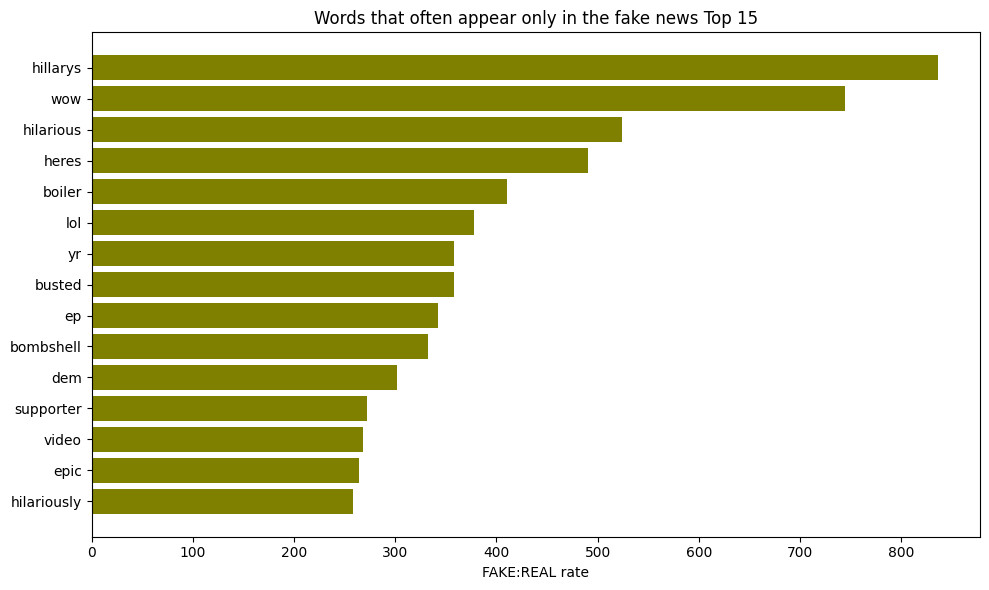

In [96]:
import matplotlib.pyplot as plt

top_words = filtered_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['fake_to_real_ratio'], color='olive')
plt.xlabel("FAKE:REAL rate")
plt.title("Words that often appear only in the fake news Top 15")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


FAKEÏôÄ REALÏóê Î™®Îëê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îßå ÎπÑÍµê

In [97]:
# ÎëêÏ™ΩÏóê Î™®Îëê Îì±Ïû•Ìïú Îã®Ïñ¥Îßå Ï∂îÏ∂ú
common_words = set(fake_counts.keys()) & set(real_counts.keys())

word_ratio_data = []
for word in common_words:
    fake_count = fake_counts[word]
    real_count = real_counts[word]
    ratio = fake_count / (real_count + 1e-5)  # Î≥¥Ï†ïÍ∞í ÏïÑÏ£º ÏûëÍ≤å
    total = fake_count + real_count
    word_ratio_data.append((word, fake_count, real_count, ratio, total))

In [98]:
# word_ratio_data: [(word, fake_count, real_count, ratio, total), ...]
common_df = pd.DataFrame(
    word_ratio_data,
    columns=["word", "fake_count", "real_count", "fake_to_real_ratio", "total_count"]
)

# Î∂ÑÏÑùÏùÑ Î™ÖÌôïÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ ÏµúÏÜå Îì±Ïû• ÌöüÏàò ÌïÑÌÑ∞ÎßÅ (Ïòà: 5Ìöå Ïù¥ÏÉÅ)
common_df = common_df[common_df['total_count'] >= 5]

# ÎπÑÏú® Í∏∞Ï§Ä Ï†ïÎ†¨
common_df = common_df.sort_values(by='fake_to_real_ratio', ascending=False)


<ipython-input-99-951a6e040f62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')


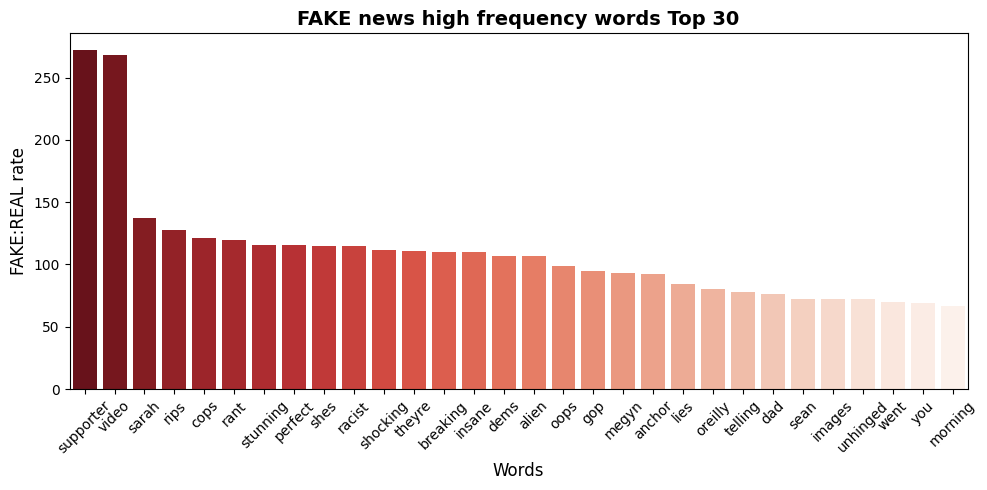

In [99]:
# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ ÏãúÍ∞ÅÌôî
top_words = common_df.head(30)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_words, x='word', y='fake_to_real_ratio', palette='Reds_r')
plt.title("FAKE news high frequency words Top 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("FAKE:REAL rate", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ÎπÑÏú®Ïù¥ ÏïÑÎãàÎùº "ÎπÑÏú® Ï∞®Ïù¥"Í∞Ä ÌÅ∞ Îã®Ïñ¥Î•º Ï†ïÍ∑úÌôîÌï¥ÏÑú Ï∂îÏ∂ú

In [100]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò
total_fake_words = sum(fake_counts.values())
total_real_words = sum(real_counts.values())

# Ï†ïÍ∑úÌôîÎêú ÎπÑÏú® ÎπÑÍµê
word_ratio_data = []
for word in set(fake_counts.keys()) | set(real_counts.keys()):
    fake_freq = fake_counts[word] / total_fake_words
    real_freq = real_counts.get(word, 0) / total_real_words
    ratio = fake_freq / (real_freq + 1e-6)  # ÎπÑÏú® ÎåÄÎπÑ
    total = fake_counts[word] + real_counts.get(word, 0)
    word_ratio_data.append((word, fake_counts[word], real_counts.get(word, 0), ratio, total))


In [101]:
# Î¶¨Ïä§Ìä∏ ‚Üí DataFrame Î≥ÄÌôò
norm_df = pd.DataFrame(
    word_ratio_data,
    columns=['word', 'fake_count', 'real_count', 'normalized_fake_to_real_ratio', 'total_count']
)

# ÌïÑÌÑ∞ÎßÅ: ÎÑàÎ¨¥ Ï†ÅÍ≤å Îì±Ïû•Ìïú Îã®Ïñ¥ Ï†úÏô∏ (Ïòà: Ï¥ù 5Ìöå Ïù¥ÏÉÅ Îì±Ïû•)
norm_df = norm_df[norm_df['total_count'] >= 5]

# Ï†ïÎ†¨: ÎπÑÏú®Ïù¥ ÎÜíÏùÄ Ïàú
norm_df = norm_df.sort_values(by='normalized_fake_to_real_ratio', ascending=False)


<ipython-input-102-507ed5100b51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')


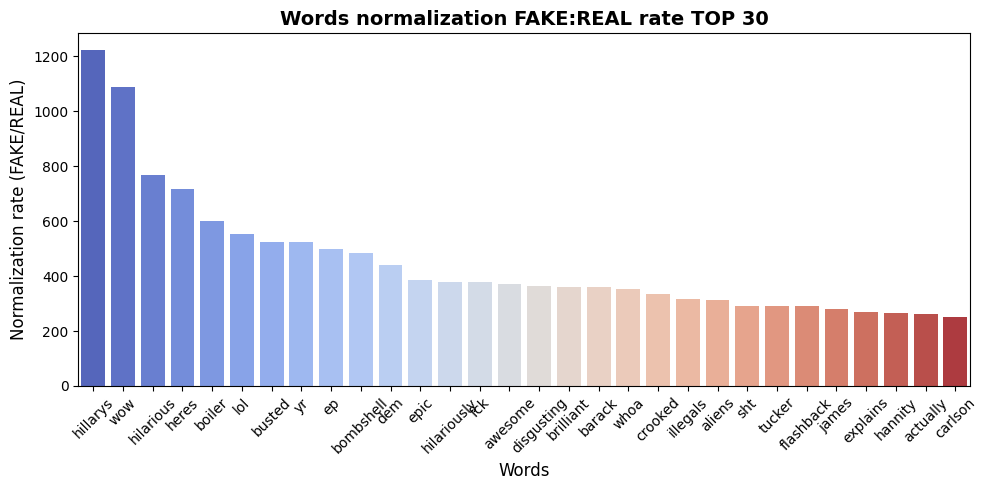

In [102]:
# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ ÏÑ†ÌÉù
top_norm = norm_df.head(30)

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
sns.barplot(data=top_norm, x='word', y='normalized_fake_to_real_ratio', palette='coolwarm')

plt.title("Words normalization FAKE:REAL rate TOP 30", fontsize=14, weight='bold')
plt.xlabel("Words", fontsize=12)
plt.ylabel("Normalization rate (FAKE/REAL)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ïù¥Î†áÍ≤å Ìï¥ÎèÑ Îëò Îã§ ÎπÑÏä∑ÌïòÍ≤å Îã®Ïñ¥ ÏÇ¨Ïö©Ïù¥ ÎêòÏñ¥ÏÑú Ï≤òÏùåÎ∂ÄÌÑ∞ ÌÉÄÏù¥ÌãÄ Í∞êÏ†ï Î∂ÑÏÑùÏùÑ Ìï¥Î≥¥Í∏∞Î°ú Ìï®

In [103]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ï≤òÏùå Ìïú Î≤àÎßå Ïã§Ìñâ ÌïÑÏöî
nltk.download('vader_lexicon')

# Í∞êÏÑ± Î∂ÑÏÑùÍ∏∞ Í∞ùÏ≤¥ ÏÉùÏÑ±
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [104]:
# Îâ¥Ïä§ Ï†úÎ™© Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ (compound: Ï¢ÖÌï© Í∞êÏ†ï Ï†êÏàò)
df['sentiment_score'] = df['title'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Í∞êÏÑ± Ï†êÏàò Ìï¥ÏÑù (ÏÑ†ÌÉùÏÇ¨Ìï≠: Î≤îÏ£ºÌôî)
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)


In [105]:
X_features['sentiment_score'] = df['sentiment_score'].copy()
X_features['sentiment_label'] = df['sentiment_label'].copy()
X_features

title_length label  text_length  sentiment_score sentiment_label
0                12  FAKE          495          -0.7096        negative
1                 8  FAKE          305          -0.3400        negative
2                15  FAKE          580          -0.2960        negative
3                14  FAKE          444          -0.2484        negative
4                11  FAKE          420           0.0000         neutral
...             ...   ...          ...              ...             ...
44893             9  REAL          466           0.2333        positive
44894             7  REAL          125           0.0000         neutral
44895             7  REAL          320           0.0000         neutral
44896             9  REAL          205           0.0000         neutral
44897             9  REAL          210           0.2263        positive

[44898 rows x 5 columns]

<ipython-input-106-786b99bdef0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})


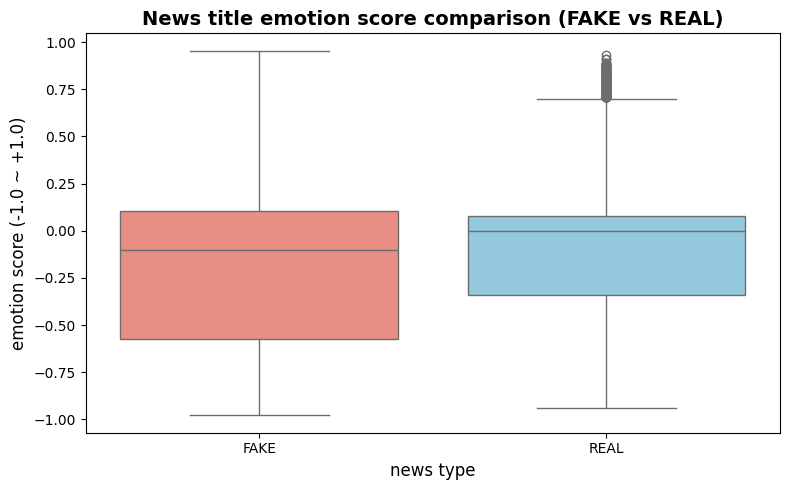

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='sentiment_score', data=df, palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("news type", fontsize=12)
plt.ylabel("emotion score (-1.0 ~ +1.0)", fontsize=12)
plt.tight_layout()
plt.show()

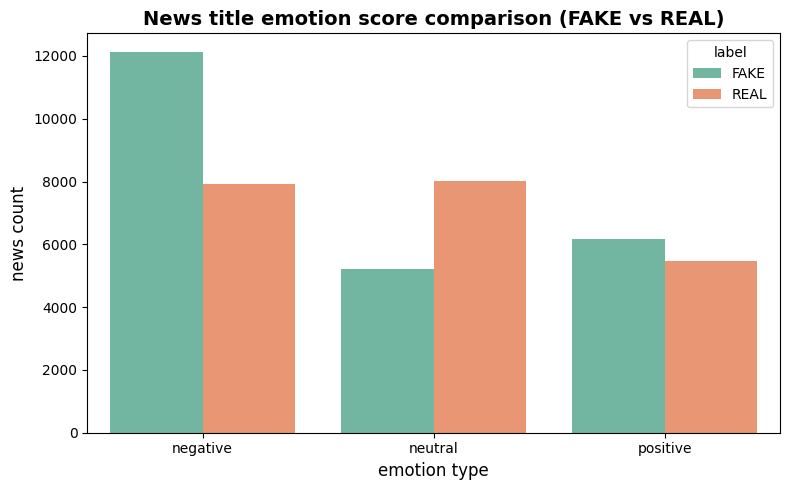

In [107]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', hue='label', palette='Set2')
plt.title("News title emotion score comparison (FAKE vs REAL)", fontsize=14, weight='bold')
plt.xlabel("emotion type", fontsize=12)
plt.ylabel("news count", fontsize=12)
plt.tight_layout()
plt.show()

In [108]:
import re
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

POS_MAP = {
    'Noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjective': ['JJ', 'JJR', 'JJS']
}

# Îã®Ïñ¥Îßå Ï∂îÏ∂ú (Î¨∏Ïû•Î∂ÄÌò∏ Ï†úÍ±∞)
def clean_tokenize(text):
    tokens = word_tokenize(str(text))
    # ÏïåÌååÎ≤≥ÏúºÎ°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ Îã®Ïñ¥Îßå ÌïÑÌÑ∞ÎßÅ (Î¨∏Ïû•Î∂ÄÌò∏, Ïà´Ïûê Ï†úÏô∏)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return tokens

In [109]:
from nltk import pos_tag
from collections import Counter

def extract_pos_words(text_list, pos_type):
    words = []
    for text in text_list.dropna():
        tokens = clean_tokenize(text)  # Ïó¨Í∏∞Ïóê Ï†ÅÏö©!
        tagged = pos_tag(tokens)
        words += [word for word, tag in tagged if tag in POS_MAP[pos_type]]
    return Counter(words).most_common(20)


In [110]:
# FAKEÏôÄ REAL Î∂ÑÎ¶¨
df_fake = df[df['label'] == 'FAKE']
df_real = df[df['label'] == 'REAL']

# ÌíàÏÇ¨Î≥Ñ Îã®Ïñ¥ Ï∂îÏ∂ú
results = {
    'FAKE_title': {},
    'FAKE_text': {},
    'REAL_title': {},
    'REAL_text': {}
}

for pos_type in ['Noun', 'Verb', 'Adjective']:
    results['FAKE_title'][pos_type] = extract_pos_words(df_fake['title'], pos_type)
    results['FAKE_text'][pos_type] = extract_pos_words(df_fake['text'], pos_type)
    results['REAL_title'][pos_type] = extract_pos_words(df_real['title'], pos_type)
    results['REAL_text'][pos_type] = extract_pos_words(df_real['text'], pos_type)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
def display_pos_table(result_dict, label, section):
    print(f"\nüîç {label.upper()} Îâ¥Ïä§ ‚Äî {section.upper()} ÌíàÏÇ¨Î≥Ñ Îã®Ïñ¥ TOP 15")
    for pos in ['Noun', 'Verb', 'Adjective']:
        print(f"\n‚ñ∂ {pos}")
        print(pd.DataFrame(result_dict[f"{label}_{section}"][pos], columns=['word', 'count']))

# FAKE Îâ¥Ïä§
display_pos_table(results, 'FAKE', 'title')
display_pos_table(results, 'FAKE', 'text')

# REAL Îâ¥Ïä§
display_pos_table(results, 'REAL', 'title')
display_pos_table(results, 'REAL', 'text')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_pos_words(result_dict, label, section, pos):
    # Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    word_data = result_dict[f'{label}_{section}'][pos]
    df = pd.DataFrame(word_data, columns=['word', 'count'])

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='word', y='count', palette='viridis')
    plt.title(f"{label} News ‚Äî {section} ‚Äî {pos} Top Words", fontsize=14, weight='bold')
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Text Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# FAKE Îâ¥Ïä§ Ï†úÎ™©ÏóêÏÑú ÏûêÏ£º ÎÇòÏò® ÌòïÏö©ÏÇ¨
plot_top_pos_words(results, 'FAKE', 'title', 'Adjective')

# REAL Îâ¥Ïä§ Î≥∏Î¨∏ÏóêÏÑú ÏûêÏ£º ÎÇòÏò® Î™ÖÏÇ¨
plot_top_pos_words(results, 'REAL', 'text', 'Noun')

# Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÌïòÍ≥† Ïã∂Îã§Î©¥
for label in ['FAKE', 'REAL']:
    for section in ['title', 'text']:
        for pos in ['Noun', 'Verb', 'Adjective']:
            plot_top_pos_words(results, label, section, pos)


In [ ]:
def get_pos_compare_df(result_dict, section, pos_type, top_n=20):
    fake_words = dict(result_dict[f'FAKE_{section}'][pos_type])
    real_words = dict(result_dict[f'REAL_{section}'][pos_type])

    # Í≥µÌÜµ Îã®Ïñ¥ + FAKEÏóêÏÑúÎßå, REALÏóêÏÑúÎßå ÏûàÎäî Îã®Ïñ¥ Ìè¨Ìï®
    all_words = set(fake_words) | set(real_words)

    data = []
    for word in all_words:
        data.append({
            'word': word,
            'FAKE': fake_words.get(word, 0),
            'REAL': real_words.get(word, 0)
        })

    df_comp = pd.DataFrame(data)
    df_comp['total'] = df_comp['FAKE'] + df_comp['REAL']

    # ÏûêÏ£º Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ ÏÉÅÏúÑ NÍ∞úÎßå ÏÑ†ÌÉù
    df_top = df_comp.sort_values(by='total', ascending=False).head(top_n)
    return df_top


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pos_comparison(df, pos_type, section):
    df_melted = df.melt(id_vars='word', value_vars=['FAKE', 'REAL'], var_name='label', value_name='count')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, y='word', x='count', hue='label', palette={'FAKE': 'salmon', 'REAL': 'skyblue'})
    plt.title(f"{section.upper()} ‚Äî {pos_type} Compare Words (FAKE vs REAL)", fontsize=14, weight='bold')
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


In [ ]:
# Ïòà: Î™®Îì† ÌíàÏÇ¨Ïóê ÎåÄÌï¥ title Í∏∞Ï§Ä ÎπÑÍµê
for pos in ['Noun', 'Verb', 'Adjective']:
    df_pos = get_pos_compare_df(results, section='title', pos_type=pos)
    plot_pos_comparison(df_pos, pos_type=pos, section='title')


In [ ]:
# Ïòà: Î™®Îì† ÌíàÏÇ¨Ïóê ÎåÄÌï¥ text Í∏∞Ï§Ä ÎπÑÍµê
for pos in ['Noun', 'Verb', 'Adjective']:
    df_pos = get_pos_compare_df(results, section='text', pos_type=pos)
    plot_pos_comparison(df_pos, pos_type=pos, section='text')


In [111]:
X_features

title_length label  text_length  sentiment_score sentiment_label
0                12  FAKE          495          -0.7096        negative
1                 8  FAKE          305          -0.3400        negative
2                15  FAKE          580          -0.2960        negative
3                14  FAKE          444          -0.2484        negative
4                11  FAKE          420           0.0000         neutral
...             ...   ...          ...              ...             ...
44893             9  REAL          466           0.2333        positive
44894             7  REAL          125           0.0000         neutral
44895             7  REAL          320           0.0000         neutral
44896             9  REAL          205           0.0000         neutral
44897             9  REAL          210           0.2263        positive

[44898 rows x 5 columns]

| ÌîºÏ≤ò Ïù¥Î¶Ñ             | ÏÑ§Î™Ö                  |
| ----------------- | ------------------- |
| `title_length`    | Ï†úÎ™©Ïùò Îã®Ïñ¥ Ïàò            |
| `text_length`     | Î≥∏Î¨∏Ïùò Îã®Ïñ¥ Ïàò            |
| `sentiment_score` | Í∞êÏÑ± Î∂ÑÏÑù Ï†êÏàò (compound) |
| `sentiment_label` | Í∞êÏÑ± Î∂ÑÏÑù Ï†êÏàò Î≤îÏúÑ  |

| ÌäπÏÑ±       | ÏöîÏïΩ ÏÑ§Î™Ö                               |
| -------- | ----------------------------------- |
| ÌÉÄÏù¥ÌãÄ Îã®Ïñ¥ Ïàò | ÏßÑÏßú Îâ¥Ïä§Îäî ÌèâÍ∑† 10Îã®Ïñ¥ ÎÇ¥Ïô∏                   |
| ÌÖçÏä§Ìä∏ Í∏∏Ïù¥   | ÏßÑÏßú Îâ¥Ïä§Îäî ÌèâÍ∑† 400Îã®Ïñ¥ Ïù¥Ìïò                  |
| Í∞êÏ†ï Ï†êÏàò    | ÏßÑÏßú Îâ¥Ïä§Îäî Ï§ëÎ¶Ω Î≤îÏúÑ (-0.25 \~ 0.25) ÎπÑÏú® ‚Üë   |
| Í∞êÏ†ï Îã®Ïñ¥    | Ï§ëÎ¶Ω Îã®Ïñ¥Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©Îê®                    |
| ÎèôÏÇ¨ ÏÇ¨Ïö©    | ÌÉÄÏù¥ÌãÄ: says / ÌÖçÏä§Ìä∏: saidÍ∞Ä REALÏóêÏÑú ÎπàÎèÑ ÎÜíÏùå |
| ÌíàÏÇ¨ ÏÇ¨Ïö©    | FAKE Îâ¥Ïä§ÏóêÏÑú ÌòïÏö©ÏÇ¨(ÏûêÍ∑π ÌëúÌòÑ) ÏÇ¨Ïö©Î•† ‚Üë          |


In [112]:
y = pd.DataFrame()
y = X_features['label'].map({'FAKE': 1, 'REAL': 0})
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: label, Length: 44898, dtype: int64

In [113]:
X_features = X_features.drop(columns=['label'])
X_features

title_length  text_length  sentiment_score sentiment_label
0                12          495          -0.7096        negative
1                 8          305          -0.3400        negative
2                15          580          -0.2960        negative
3                14          444          -0.2484        negative
4                11          420           0.0000         neutral
...             ...          ...              ...             ...
44893             9          466           0.2333        positive
44894             7          125           0.0000         neutral
44895             7          320           0.0000         neutral
44896             9          205           0.0000         neutral
44897             9          210           0.2263        positive

[44898 rows x 4 columns]

In [114]:
X_features.to_csv("input.csv", index=False, encoding='utf-8')
y.to_csv("output.csv", index=False, encoding='utf-8')